# Classification NBA Model

## Libraries

In [ ]:
save_models_path = "/home/adrian_alvarez/Projects/NBA_over_under_predictor/models/classifier/"
prefix_name = "classifier_total_bet_"

## Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from nba_ou.data_preparation.missing_data.handle_missing_data import apply_missing_policy, compute_and_save_train_medians

## Load Data

In [4]:
data_path = "/home/adrian_alvarez/Projects/NBA_over_under_predictor/data/train_data/"
name = "training_data_from_2004-10-01_to_2026-01-10.csv"
path = data_path + name

df_stats = pd.read_csv(path)

dtype_dict = {col: str for col in df_stats.columns if "ID" in col.upper()}

df_stats = pd.read_csv(
    path,
    dtype=dtype_dict
)
df_stats['GAME_DATE'] = pd.to_datetime(df_stats['GAME_DATE']).dt.strftime('%Y-%m-%d')

/tmp/ipykernel_449741/3758133838.py:5: DtypeWarning: Columns (205,206,207,248,249,250,291,292,293,334,335,336,377,378,379,420,421,422,616,617,618,659,660,661,702,703,704,745,746,747,788,789,790,831,832,833) have mixed types. Specify dtype option on import or set low_memory=False.
  df_stats = pd.read_csv(path)
/tmp/ipykernel_449741/3758133838.py:9: DtypeWarning: Columns (205,206,207,248,249,250,291,292,293,334,335,336,377,378,379,420,421,422,616,617,618,659,660,661,702,703,704,745,746,747,788,789,790,831,832,833) have mixed types. Specify dtype option on import or set low_memory=False.
  df_stats = pd.read_csv(


In [5]:
df_stats= df_stats[df_stats['TOTAL_POINTS'] > 130]

In [6]:
df_stats.shape[0]

23691

In [7]:
df_stats

,TOTAL_OVER_UNDER_LINE,TEAM_ID_TEAM_HOME,TEAM_CITY_TEAM_HOME,TEAM_ABBREVIATION_TEAM_HOME,TEAM_NAME_TEAM_HOME,MATCHUP_TEAM_HOME,GAME_NUMBER_TEAM_HOME,TEAM_ID_TEAM_AWAY,TEAM_CITY_TEAM_AWAY,TEAM_ABBREVIATION_TEAM_AWAY,...,PTS_TREND_SLOPE_DIFF_HOME_MINUS_AWAY,PTS_TREND_SLOPE_SUM_HOME_PLUS_AWAY,TRAVEL_RECENCY_RATIO_HOME_2D_OVER_14D,TRAVEL_RECENCY_RATIO_AWAY_2D_OVER_14D,REST_DAYS_DIFF_HOME_MINUS_AWAY,INJURY_PTS_SHARE_HOME,INJURY_PTS_SHARE_AWAY,STAR_PTS_PCT_DIFF_HOME_MINUS_AWAY,POSS_X_TSPCT_HOME,POSS_X_TSPCT_AWAY
0,240.9999,1610612762,Utah,UTA,Utah Jazz,UTA vs. CHA,38,1610612766,Charlotte,CHA,...,1.7,-3.1,0.788795,0.000000,0,0.240990,0.133469,0.022339,60.680317,57.657276
1,240.4999,1610612739,Cleveland,CLE,Cleveland Cavaliers,CLE vs. MIN,40,1610612750,Minnesota,MIN,...,-10.7,-6.5,0.773813,0.000000,0,0.098350,0.080271,0.014506,59.123238,61.144985
2,214.4999,1610612765,Detroit,DET,Detroit Pistons,DET vs. LAC,38,1610612746,LA,LAC,...,-8.5,-3.3,0.000000,0.234741,2,0.495857,0.234389,-0.156275,58.487861,56.322250
3,236.4999,1610612754,Indiana,IND,Indiana Pacers,IND vs. MIA,39,1610612748,Miami,MIA,...,8.6,-1.6,0.727915,0.000000,-2,0.379738,0.021147,0.006671,56.971687,59.561623
4,233.4999,1610612741,Chicago,CHI,Chicago Bulls,CHI vs. DAL,38,1610612742,Dallas,DAL,...,2.3,0.1,0.000000,0.766714,1,0.289831,0.425103,-0.010188,58.130139,57.252427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,215.5000,1610612740,New Orleans,NOH,New Orleans Pelicans,NOH vs. SAC,1,1610612758,Sacramento,SAC,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
23687,191.0000,1610612739,Cleveland,CLE,Cleveland Cavaliers,CLE vs. DAL,1,1610612742,Dallas,DAL,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
23688,183.5000,1610612747,Los Angeles,LAL,Los Angeles Lakers,LAL vs. HOU,1,1610612745,Houston,HOU,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
23689,208.5000,1610612759,San Antonio,SAS,San Antonio Spurs,SAS vs. POR,1,1610612757,Portland,POR,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [8]:
#count nas in TOTA_OVER_UNDER_LINE
nans = df_stats['TOTAL_OVER_UNDER_LINE'].isna().sum()
print(f"Number of NaNs in TOTAL_OVER_UNDER_LINE: {nans}")

Number of NaNs in TOTAL_OVER_UNDER_LINE: 1702


In [9]:
df_stats.dropna(subset=['TOTAL_OVER_UNDER_LINE'], inplace=True)
df_stats = df_stats[df_stats['TOTAL_OVER_UNDER_LINE'] > 100]

In [10]:
df_stats['SEASON_YEAR'].unique()

array([2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015,
       2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007])

In [11]:
#drop season 2007
df_stats = df_stats[df_stats['SEASON_YEAR'] != 2007]

In [12]:
df_to_train = df_stats.copy()

In [13]:
text_columns = df_to_train.select_dtypes(include=['object', 'string']).columns

# Print the names of the columns containing text
# print("Text columns:", list(text_columns))
cols_to_drop = ['SEASON_ID', 'GAME_ID', 'SEASON_TYPE',  'TEAM_ID_TEAM_HOME',
       'TEAM_ID_TEAM_AWAY','IS_OVERTIME']

cols_to_drop += [
    "MATCHUP_TEAM_HOME",
    "TEAM_CITY_TEAM_AWAY",
    "TEAM_ABBREVIATION_TEAM_AWAY",
    "TEAM_ABBREVIATION_TEAM_HOME",
    "TEAM_CITY_TEAM_HOME",
    "TEAM_NAME_TEAM_AWAY",
    "MATCHUP_TEAM_AWAY",
    "TEAM_NAME_TEAM_HOME"
]
cols_to_drop += list(text_columns)

cols_to_drop.pop(cols_to_drop.index('GAME_DATE'))

df_to_train.drop(columns=cols_to_drop, inplace=True, errors='ignore')


In [14]:
#Calculate number fo rows with at least 1 NA in total and in percentage
rows_with_na = df_to_train.isna().any(axis=1).sum()
total_rows = df_to_train.shape[0]
percentage_with_na = (rows_with_na / total_rows) * 100
print(f"Rows with at least one NA: {rows_with_na} out of {total_rows} ({percentage_with_na:.2f}%)")

Rows with at least one NA: 1862 out of 20775 (8.96%)


In [15]:
# Count NAs per column
na_counts = df_to_train.isna().sum()

# Get most common SEASON_YEAR for nulls in each column
most_common_season = []
for col in df_to_train.columns:
    if na_counts[col] > 0:
        # Get rows where this column is null
        null_rows = df_stats[df_stats[col].isna()]
        if len(null_rows) > 0 and 'SEASON_YEAR' in df_stats.columns:
            # Find most common SEASON_YEAR for these null rows
            common_season = null_rows['SEASON_YEAR'].mode()
            most_common_season.append(common_season.iloc[0] if len(common_season) > 0 else None)
        else:
            most_common_season.append(None)
    else:
        most_common_season.append(None)

na_counts_df = pd.DataFrame({
    'Column': na_counts.index,
    'NA_Count': na_counts.values,
    'NA_Percentage': (na_counts.values / len(df_to_train) * 100).round(2),
    'Most_Common_Season_Year': most_common_season
}).sort_values('NA_Count', ascending=False)

# Show only columns with NAs
na_counts_df[na_counts_df['NA_Count'] > 0]

,Column,NA_Count,NA_Percentage,Most_Common_Season_Year
515,TOTAL_OVER_UNDER_LINE_COMBINED_TREND_SLOPE_LAS...,627,3.02,2022.0
610,TRAVEL_RECENCY_RATIO_AWAY_2D_OVER_14D,561,2.70,2019.0
606,PTS_FORM_Z_AWAY_LAST5_VS_SEASON,561,2.70,2010.0
605,PTS_FORM_Z_HOME_LAST5_VS_SEASON,554,2.67,2022.0
494,AVG_POINTS_CONCEDED_AT_HOME_BEFORE_GAME,540,2.60,2008.0
...,...,...,...,...
529,REF_TRIO_DIFFERENCE_FROM_LINE_DIFF_BEFORE,23,0.11,2023.0
531,SPREAD,12,0.06,2011.0
598,IMPLIED_PTS_HOME,12,0.06,2011.0
532,MONEYLINE_TEAM_HOME,12,0.06,2011.0


In [16]:
# df_to_train.fillna(0, inplace=True)

In [17]:
print("Applying missing data policy...")
print(f"Data shape before handling missing data: {df_to_train.shape}")

Applying missing data policy...
Data shape before handling missing data: (20775, 617)


In [18]:
    # Training time
train_medians = compute_and_save_train_medians(df_to_train)

# Prediction time
df_to_train, report = apply_missing_policy(
    df_to_train,
    train_medians=train_medians,
    current_total_line_col="TOTAL_OVER_UNDER_LINE",
    drop_mode="strict",)

In [19]:
print(f"Data shape after handling missing data: {df_to_train.shape}")

Data shape after handling missing data: (20379, 617)


In [20]:
null_rows = df_to_train[df_to_train.isnull().any(axis=1)]
print(f"Total number of null values in the DataFrame: {null_rows.shape[0]}")
print(f"Percentage of null values in the DataFrame: {null_rows.shape[0] / df_to_train.shape[0] * 100:.2f}%")
print(f"Total number of rows in the DataFrame: {df_to_train.shape[0]}")

null_columns = df_to_train.columns[df_to_train.isnull().any()].tolist()
print(f"Columns with null values: {null_columns}")


Total number of null values in the DataFrame: 0
Percentage of null values in the DataFrame: 0.00%
Total number of rows in the DataFrame: 20379
Columns with null values: []


In [21]:
df_to_train.drop(columns='GAME_DATE', inplace=True)

In [22]:
df_to_train['OVER_UNDER'] = np.where(df_to_train['TOTAL_POINTS'] >= df_to_train['TOTAL_OVER_UNDER_LINE'], 1, 0) # 1 if over, 0 if under

In [23]:
#count 1 and 0 in OVER_UNDER
df_to_train['OVER_UNDER'].value_counts()

OVER_UNDER
0    10631
1     9748
Name: count, dtype: int64

## Train / Test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_to_train.drop(cols_to_drop + ['TOTAL_POINTS', 'OVER_UNDER'], axis=1, errors='ignore')
y = df_to_train['OVER_UNDER']

In [26]:
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [40]:
df_to_train['IS_TRAINING_DATA'] = False

# Mark True for the rows in the training set
df_to_train.loc[X_train.index, 'IS_TRAINING_DATA'] = True
output_name = f"{data_path}/training_data_with_missing_data_handled_from_2004-10-01_to_2026-01-10_classifier.csv"
df_to_train.to_csv(output_name, index=False)

In [41]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
# Check number of coulmns
print(f"Number of columns in training set: {X_train.shape[1]}")
print(f"Number of columns in test set: {X_test.shape[1]}")

Training set size: 16303
Test set size: 4076
Number of columns in training set: 615
Number of columns in test set: 615


## Cross-validation

In [27]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    classification_report, make_scorer, balanced_accuracy_score
)

In [28]:
# Declare KFold
kf = KFold(n_splits=5, shuffle=True, random_state=16)

In [29]:
# Declare scores to be used
scoring = {
    'Acc': make_scorer(accuracy_score),
    'Prec': make_scorer(precision_score),
    'Rec': make_scorer(recall_score),
    'Bacc': make_scorer(balanced_accuracy_score),
}

In [30]:

def print_classification_metrics(cv_results, scoring):
    """
    Prints the mean cross-validation scores for each metric on train and validation folds.
    """
    for sc in scoring.keys():
        print(f"Train {sc}:", cv_results[f'train_{sc}'].mean().round(5))
        print(f"Validation {sc}:", cv_results[f'test_{sc}'].mean().round(5))
        print()

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """
    Plots a basic confusion matrix using Matplotlib.
    """
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, aspect='equal')

    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(title)

    # Show text on matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")
    plt.show()
    

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    classification_report, make_scorer
)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Baseline

In [47]:
from sklearn.dummy import DummyClassifier

In [48]:
dummy_clf = DummyClassifier(strategy='most_frequent')
cv_results = cross_validate(
    dummy_clf, 
    X_train, 
    y_train, 
    cv=kf, 
    scoring=scoring, 
    return_train_score=True
)
dummy_clf.fit(X_train, y_train)
print("=== Dummy (Most Frequent) Classifier ===")
print_classification_metrics(cv_results, scoring)

/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavi

=== Dummy (Most Frequent) Classifier ===
Train Acc: 0.52316
Validation Acc: 0.52315

Train Prec: 0.0
Validation Prec: 0.0

Train Rec: 0.0
Validation Rec: 0.0

Train Bacc: 0.5
Validation Bacc: 0.5



/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavi

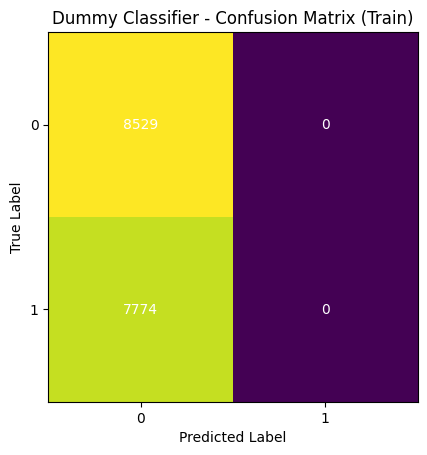

In [49]:
y_train_preds_dummy = dummy_clf.predict(X_train)
plot_confusion_matrix(y_train, y_train_preds_dummy, 
                      title="Dummy Classifier - Confusion Matrix (Train)")

## Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LogisticRegression(max_iter=1000)
cv_results = cross_validate(
    lr, 
    X_train, 
    y_train, 
    cv=kf, 
    scoring=scoring, 
    return_train_score=True,
    n_jobs=-1
)
lr.fit(X_train, y_train)


/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option

LogisticRegression(max_iter=1000)

In [51]:
print("=== Logistic Regression ===")
print_classification_metrics(cv_results, scoring)

=== Logistic Regression ===
Train Acc: 0.67465
Validation Acc: 0.64277

Train Prec: 0.66677
Validation Prec: 0.63173

Train Rec: 0.63507
Validation Rec: 0.60156

Train Bacc: 0.67287
Validation Bacc: 0.64101



In [52]:
rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5,
    max_features=0.6,
    random_state=16,
    n_jobs=-1
)

cv_results = cross_validate(
    rf, 
    X_train, 
    y_train, 
    cv=kf, 
    scoring=scoring, 
    return_train_score=True, 
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.6, n_jobs=-1,
                       random_state=16)

In [53]:
print("=== Random Forest Classifier ===")
print_classification_metrics(cv_results, scoring)

=== Random Forest Classifier ===
Train Acc: 0.68414
Validation Acc: 0.63841

Train Prec: 0.70269
Validation Prec: 0.64564

Train Rec: 0.58535
Validation Rec: 0.53801

Train Bacc: 0.67967
Validation Bacc: 0.63443



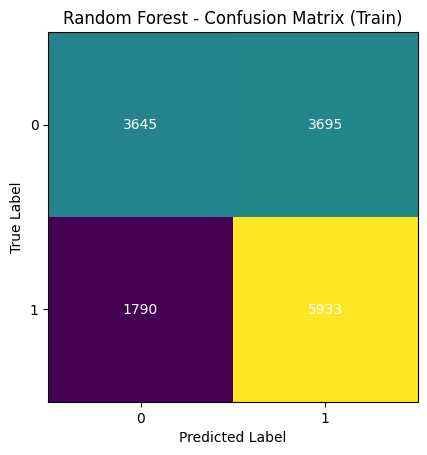

In [29]:
y_train_preds_rf = rf.predict(X_train)
plot_confusion_matrix(y_train, y_train_preds_rf,
                      title="Random Forest - Confusion Matrix (Train)")

In [50]:
xgb_clf = XGBClassifier(
    max_depth=5,
    learning_rate=0.05,
    n_estimators=500,
    subsample=1.0,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=16
)

cv_results = cross_validate(
    xgb_clf, 
    X_train, 
    y_train, 
    cv=kf, 
    scoring=scoring, 
    return_train_score=True,
    n_jobs=-1
)

xgb_clf.fit(X_train, y_train)

print("=== XGBClassifier ===")
print_classification_metrics(cv_results, scoring)

=== XGBClassifier ===
Train Acc: 0.96261
Validation Acc: 0.64043

Train Prec: 0.96705
Validation Prec: 0.62824

Train Rec: 0.9541
Validation Rec: 0.60337

Train Bacc: 0.96223
Validation Bacc: 0.63904



In [51]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """
    Plots a basic confusion matrix using Matplotlib.
    """
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, aspect='equal')

    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(title)

    # Show text on matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")
    plt.show()

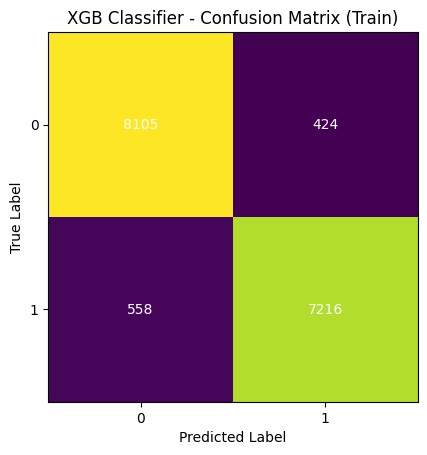

In [52]:
y_train_preds_xgb = xgb_clf.predict(X_train)
plot_confusion_matrix(y_train, y_train_preds_xgb, 
                      title="XGB Classifier - Confusion Matrix (Train)")

In [54]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [55]:
brf = BalancedRandomForestClassifier(200,
                                     max_depth=None,
                                     sampling_strategy='not minority',
                                     replacement=True,
                                     n_jobs=-1)
brf_cv = cross_validate(brf, X_train, y_train, cv=kf,
                        scoring=scoring, return_train_score=True)

print_classification_metrics(brf_cv, scoring)

Train Acc: 1.0
Validation Acc: 0.5856

Train Prec: 1.0
Validation Prec: 0.5391

Train Rec: 1.0
Validation Rec: 0.90279

Train Bacc: 1.0
Validation Bacc: 0.59968



## Hyperparameter Tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Randomized Search

### Grid Search

In [60]:
import os
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier

In [61]:
def print_rs_clf_scores(gscv_model):
    """
    Prints the best hyperparameters and the corresponding accuracy and errors.
    """
    best_idx = gscv_model.best_index_
    best_params = gscv_model.best_params_
    
    # mean_train_score and mean_test_score hold the average CV train/test accuracies
    train_acc = gscv_model.cv_results_['mean_train_score'][best_idx]
    valid_acc = gscv_model.cv_results_['mean_test_score'][best_idx]
    
    print("Best Parameters:", best_params, "\n")
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Validation Accuracy (CV): {valid_acc:.3f}")
    print(f"Train Error: {(1 - train_acc):.3f}")
    print(f"Validation Error (CV): {(1 - valid_acc):.3f}")

In [62]:
def print_rs_clf_scores(gscv_model):
    """
    Prints the best hyperparameters and the corresponding training and validation metrics.
    """
    best_idx = gscv_model.best_index_
    best_params = gscv_model.best_params_

    # Metrics used during scoring
    metrics = ['Acc', 'Prec', 'Rec', 'Bacc']

    print("Best Parameters:", best_params, "\n")
    
    for metric in metrics:
        train_score = gscv_model.cv_results_.get(f'mean_train_{metric}', None)
        valid_score = gscv_model.cv_results_.get(f'mean_test_{metric}', None)
        
        if train_score is not None and valid_score is not None:
            train_val = train_score[best_idx]
            valid_val = valid_score[best_idx]
            print(f"{metric} - Train: {train_val:.5f}, Validation: {valid_val:.5f}, "
                  f"Train Error: {1 - train_val:.5f}, Validation Error: {1 - valid_val:.5f}")
        else:
            print(f"{metric}: Not available (was not calculated on train set)")

In [66]:
# Define the base classifier
xgb_clf = XGBClassifier(random_state=16, n_jobs=-1)

# Define hyperparameter grid (similar to your regressor but for classification)
params = [{
    'n_estimators': [300,500],      # # of boosting rounds
    'learning_rate': [0.02, 0.01, 0.03],
    'max_depth': [3,4, 5],
    'min_child_weight': [3, 4,5],      # akin to min_samples_split
    'subsample': [0.8, 0.6,1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0],                    # regularization param
}]

xgb_gs_clf = GridSearchCV(
    estimator=xgb_clf,
    param_grid=params,
    scoring=scoring,
    cv=kf,
    verbose=1,
    refit=lambda x: x["mean_test_Bacc"].argmax(),
    return_train_score=True,
    n_jobs=-1
)

# Fit GridSearchCV
xgb_gs_clf.fit(X_train, y_train) 

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     int...
                          'subsample': [0.8, 0.6, 1]}],
             refit=<function <lambda> at 0x78f7db5f2480>,
             return_train_score=True,
             scoring={'Acc': make_scorer(accuracy_score, response_method='predict'),
                      'Bacc': make_scorer(balanced_accuracy_score, response_method='predict'),
                      'Prec': make_scorer(precision_score, response_method='predict'),
                      'Rec': make_scorer(recall_score, response_method='predict')},
             verbose=1)

In [67]:
print_rs_clf_scores(xgb_gs_clf)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.02, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.6} 

Acc - Train: 0.86223, Validation: 0.65448, Train Error: 0.13777, Validation Error: 0.34552
Prec - Train: 0.86716, Validation: 0.64330, Train Error: 0.13284, Validation Error: 0.35670
Rec - Train: 0.83974, Validation: 0.61811, Train Error: 0.16026, Validation Error: 0.38189
Bacc - Train: 0.86122, Validation: 0.65294, Train Error: 0.13878, Validation Error: 0.34706


In [32]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(
    label="target",
    problem_type="binary",
    eval_metric="balanced_accuracy",
).fit(
    train_data=X_train.assign(target=y_train),
    time_limit=7000,
    presets="good_quality",
    hyperparameter_tune_kwargs="auto",
    # num_cpus=8,
    hyperparameters={
        "XGB": {}   # only XGBoost models
    }
)

No path specified. Models will be saved in: "AutogluonModels/ag-20260123_122303"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.12.3
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #37~24.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 20 10:25:38 UTC 2
CPU Count:          12
Pytorch Version:    2.9.1+cu128
CUDA Version:       CUDA is not available
Memory Avail:       9.15 GB / 30.98 GB (29.6%)
Disk Space Avail:   25.98 GB / 464.35 GB (5.6%)
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the

In [36]:
predictor = TabularPredictor.load("/home/adrian_alvarez/Projects/NBA_over_under_predictor/lab/train_classifier/AutogluonModels/ag-20260123_122303")  # use your actual folder

print("Saved at:", predictor.path)
print("Best model:", predictor.get_model_best())
print("All models:", predictor.get_model_names())

Saved at: /home/adrian_alvarez/Projects/NBA_over_under_predictor/lab/train_classifier/AutogluonModels/ag-20260123_122303


AttributeError: 'TabularPredictor' object has no attribute 'get_model_best'

In [37]:
lb = predictor.leaderboard(silent=True)
lb


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_BAG_L1/T15,0.654515,balanced_accuracy,0.516307,111.461415,0.516307,111.461415,1,False,15
1,WeightedEnsemble_L2,0.654515,balanced_accuracy,0.521169,111.954896,0.004862,0.493481,2,False,21
2,XGBoost_BAG_L1/T4,0.654505,balanced_accuracy,0.444563,66.718052,0.444563,66.718052,1,False,4
3,XGBoost_BAG_L1/T17,0.654320,balanced_accuracy,0.908026,232.423702,0.908026,232.423702,1,False,17
4,XGBoost_BAG_L1/T6,0.654059,balanced_accuracy,0.498099,59.477676,0.498099,59.477676,1,False,6
5,XGBoost_BAG_L1/T19,0.653853,balanced_accuracy,0.791178,269.996911,0.791178,269.996911,1,False,19
6,XGBoost_BAG_L1/T10,0.652724,balanced_accuracy,0.507347,91.291098,0.507347,91.291098,1,False,10
7,XGBoost_BAG_L1/T9,0.652258,balanced_accuracy,0.446229,68.820444,0.446229,68.820444,1,False,9
8,XGBoost_BAG_L1/T14,0.651941,balanced_accuracy,0.558947,104.180556,0.558947,104.180556,1,False,14
9,XGBoost_BAG_L1/T11,0.651806,balanced_accuracy,0.814334,208.809224,0.814334,208.809224,1,False,11


In [38]:
# Keep only the best model (+ its dependencies), delete the rest from disk
predictor.delete_models(models_to_keep="best", delete_from_disk=True)

# (Optional) shrink further by removing auxiliary artifacts not needed for prediction
predictor.save_space(remove_data=True)

# Save back to disk (same folder); after this, the directory is much smaller
predictor.save()

Deleting model XGBoost_BAG_L1/T1. All files under /home/adrian_alvarez/Projects/NBA_over_under_predictor/lab/train_classifier/AutogluonModels/ag-20260123_122303/models/XGBoost_BAG_L1/T1 will be removed.
Deleting model XGBoost_BAG_L1/T2. All files under /home/adrian_alvarez/Projects/NBA_over_under_predictor/lab/train_classifier/AutogluonModels/ag-20260123_122303/models/XGBoost_BAG_L1/T2 will be removed.
Deleting model XGBoost_BAG_L1/T3. All files under /home/adrian_alvarez/Projects/NBA_over_under_predictor/lab/train_classifier/AutogluonModels/ag-20260123_122303/models/XGBoost_BAG_L1/T3 will be removed.
Deleting model XGBoost_BAG_L1/T4. All files under /home/adrian_alvarez/Projects/NBA_over_under_predictor/lab/train_classifier/AutogluonModels/ag-20260123_122303/models/XGBoost_BAG_L1/T4 will be removed.
Deleting model XGBoost_BAG_L1/T5. All files under /home/adrian_alvarez/Projects/NBA_over_under_predictor/lab/train_classifier/AutogluonModels/ag-20260123_122303/models/XGBoost_BAG_L1/T5 wi